<a href="https://colab.research.google.com/github/happyahluwalia/llm_journey/blob/main/week-01-data-pipeline/Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔤 Tokenization: Why LLMs Can't Count Letters
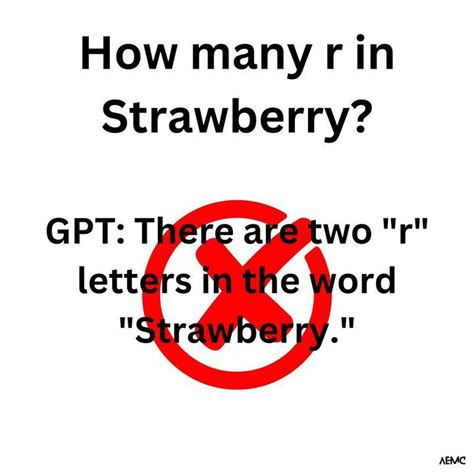

Have you ever seen the meme where an LLM can't count the number of "r"s in "strawberry"? Initial assumption: "It's so dumb!"

But let's get into the LLM's shoes and see how it actually "thinks." The answer will surprise you. 🤯

---

## 🧠 The Fundamental Problem

LLMs (or any neural network model) don't understand English or words. They only understand numbers.

So text like "Hello" must be converted to numbers: `[72, 101, 108, 108, 111]` (ASCII codes)

But here's the question: **How should we break text into these numbers?**

---

## 🎯 Three Approaches to Tokenization

### **Option 1: Words**

**Idea:** Each word becomes one token.
- "Hello" → 1 token
- "World" → 1 token

**Problems:**
- ❌ English has 170,000+ words → Massive vocabulary
- ❌ What about "run", "running", "runs"? Three different tokens?
- ❌ New words like "ChatGPT" won't be in the vocabulary
- ❌ Other languages multiply this problem

---

### **Option 2: Characters**

**Idea:** Each character becomes one token.
- "Hello" → ["H", "e", "l", "l", "o"] (5 tokens)

**Good:**
- ✅ Tiny vocabulary: 26 letters + punctuation ≈ 100 tokens

**Problems:**
- ❌ "Hello World" = 11 tokens (very inefficient!)
- ❌ Model must learn that H-e-l-l-o means something
- ❌ Sequences become extremely long

---

### **Option 3: Subwords (The Goldilocks Solution)** ✅

**Idea:** Break words into meaningful common pieces.

**Examples:**
- Common words: "Hello" → ["Hello"] (1 token, kept whole)
- Compound words: "Football" → ["Foot", "ball"] (2 tokens)
- New words: "ChatGPT" → ["Chat", "G", "PT"] (3 tokens)
- Morphemes: "running" → ["run", "ning"] (2 tokens)

**Why this works:**
- ✅ Manageable vocabulary (~50,000 tokens vs 170,000+ words)
- ✅ Can handle ANY word by combining pieces
- ✅ Common words stay efficient (1 token)
- ✅ Rare words break into known pieces
- ✅ Model learns meaningful patterns ("ing" = present progressive, "un" = negation)

This is called **Byte-Pair Encoding (BPE)** - the standard used by GPT, Claude, Llama, and most modern LLMs.

---

## 🍓 Back to the Strawberry Problem

Now we can answer: **Why can't LLMs count the "r"s in "strawberry"?**

When you type "strawberry", GPT-4 doesn't see it as one word. It sees:
- Token 1: "str" (contains 1 'r')
- Token 2: "aw" (contains 0 'r's)
- Token 3: "berry" (contains 1 'r')

**The model never sees the individual letters!** It's working with chunks, not characters.

When asked "How many r's?", it's counting from tokens, not from the actual letters. That's why it gets confused. 🤯

**The actual answer:** 3 r's (one in "str", two in "berry")  
**What the model sees:** 2 tokens that seem to have r's

This is a fundamental limitation of subword tokenization!

---

## 📊 Visual Comparison

Let's tokenize "I love artificial intelligence":

| Approach | Tokens | Count | Trade-off |
|----------|--------|-------|-----------|
| **Word-level** | ["I", "love", "artificial", "intelligence"] | 4 | "intelligence" might not be in vocabulary ❌ |
| **Character-level** | ["I", " ", "l", "o", "v", "e", ...] | 30 | Way too long! ❌ |
| **Subword (BPE)** | ["I", " love", " artificial", " intelligence"] | 4 | Perfect balance! ✅ |

---

## 💡 Key Takeaway

Tokenization is the compromise between efficiency and flexibility. It's why:
- ✅ LLMs can handle any text (even new words)
- ✅ Training is efficient (~50K vocabulary)
- ❌ But they struggle with letter-level tasks (counting, reversing, spelling)

**Remember:** When you use an LLM, you're not charged by words or characters - you're charged by **tokens**!

---

# 🔧 How BPE Actually Works

Now we know **why** we need BPE (it's the perfect middle ground between character and word tokenization). Let's see **how** it works.

---

## 🎯 The BPE Algorithm

**Steps:**
1. Start with character-level tokenization
2. Count all adjacent pairs in the training data
3. Merge the most frequent pair into a new token
4. Add to vocabulary
5. **Repeat until vocabulary reaches target size** (e.g., 50,000 tokens)

---

## 📝 Example: Training a Tiny Tokenizer

### **Training Corpus:**
`goa goal go`

(In reality, tokenizers train on billions of words, but the process is identical!)

---

### **Step 1: Start with Characters**

**Initial vocabulary (unique characters):**

`['g', 'o', 'a', ' ', 'l']`

**Initial tokenization:**


```
['g','o','a',' ','g','o','a','l',' ','g','o']
    └─goa─┘        └──goal───┘         └go┘
```

---

### **Step 2: Count Adjacent Pairs**

Looking at: `['g','o','a',' ','g','o','a','l',' ','g','o']`

| Pair | Count | Where |
|------|-------|-------|
| 'g' + 'o' | **3** | goa, goal, go ← Most frequent! |
| 'o' + 'a' | 2 | goa, goal |
| 'a' + ' ' | 2 | goa_, goal_ |
| ' ' + 'g' | 2 | _goal, _go |
| 'a' + 'l' | 1 | goal |
| 'l' + ' ' | 1 | goal_ |

---

### **Step 3: Merge Most Frequent Pair**

Merge 'g' + 'o' → 'go'

**Updated vocabulary:**

```['g', 'o', 'a', ' ', 'l', 'go']  ← Added 'go'!```

**Updated tokenization:**

```
['go','a',' ','go','a','l',' ','go']
   └goa┘        └─goal──┘      └go┘
```

Reduced from 11 tokens → 8 tokens!

---

### **Step 4: Repeat**

Count pairs again with new tokenization:

| Pair | Count |
|------|-------|
| 'go' + 'a' | **2** ← Most frequent! |
| 'a' + ' ' | 2 |
| ' ' + 'go' | 2 |
| 'a' + 'l' | 1 |
| 'l' + ' ' | 1 |

Merge 'go' + 'a' → 'goa'

**Updated vocabulary:**

```['g', 'o', 'a', ' ', 'l', 'go', 'goa']```

**Updated tokenization:**

```['goa',' ','goa','l',' ','go']```

---

### **Step 5: Continue Until Target Vocab Size**

One more merge: 'goa' + 'l' → 'goal'

**Final vocabulary:**

```['g', 'o', 'a', ' ', 'l', 'go', 'goa', 'goal']```

**Final tokenization:**

```['goal',' ','goa',' ','go']```

**Result:**
- Started with: 11 character tokens
- Ended with: 5 subword tokens
- Vocabulary grew: 5 → 8 tokens

---

## 🔑 Merge Rules = Your Tokenizer

After training, your tokenizer is just a **list of merge rules (applied in order)**:

**Our learned rules:**
1. 'g' + 'o' → 'go'
2. 'go' + 'a' → 'goa'
3. 'goa' + 'l' → 'goal'

This ordered list IS your tokenizer!

---

## 🔄 Encoding New Text (After Training)

**Text:** "goal goa gone"

**Process:**

Start with characters:

```['g','o','a','l',' ','g','o','a',' ','g','o','n','e']```

Apply merge rules in order:

**Rule 1:** 'g'+'o' → 'go'

```['go','a','l',' ','go','a',' ','go','n','e']```

**Rule 2:** 'go'+'a' → 'goa'

```['goa','l',' ','goa',' ','go','n','e']```

**Rule 3:** 'goa'+'l' → 'goal'

```['goal',' ','goa',' ','go','n','e']```

No more rules apply!

**Final tokens:** `['goal', ' ', 'goa', ' ', 'go', 'n', 'e']`

---

### **Why "gone" Stays Broken:**

"gone" becomes `['go', 'n', 'e']` because:
- ✅ We have a rule for 'g'+'o' → 'go'
- ❌ We DON'T have a rule for 'go'+'n'
- ❌ We DON'T have a rule for 'n'+'e'

So 'n' and 'e' stay as individual characters!

This is how BPE handles **any word**, even ones never seen during training.

---

## 🔄 Decoding (Simple!)

Just concatenate the tokens:

**Tokens:** `['goal', ' ', 'goa', ' ', 'go', 'n', 'e']`  
**Decoded text:** "goal goa gone"

No complex rules needed!

---

## 💡 Why BPE Is Brilliant

### **Frequency-Based Learning:**
- Common patterns automatically become tokens
- "the" appears billions of times → single token
- "supercalifragilistic" appears once → stays broken up
- No human has to decide what's a "word"!

### **Handles Anything:**
- **English words:** "unbelievable" → ['un', 'believ', 'able']
- **Code:** "print()" → ['print', '(', ')']
- **Emojis:** "😀" → Unicode characters
- **Made-up words:** "flibbertigibbet" → breaks into known pieces

### **Deterministic:**
- Same training data + same vocab size = same tokenizer
- Reproducible, predictable

---

## ⚠️ The Trade-off

**But there's a cost:**

The model **never sees individual letters**.

That's why LLMs struggle with:
- ❌ Counting letters ("how many r's in strawberry?")
- ❌ Reversing words ("reverse 'hello'")
- ❌ Spelling ("spell supercalifragilistic")

They're working with chunks like ['str', 'aw', 'berry'], not characters!

---

## 🎯 Key Takeaway

**BPE learns from data:**
- Merge frequent patterns first
- Keep vocabulary manageable (~50K tokens)
- Handle any text by breaking into known pieces

This is why modern LLMs can process **any language, any domain, any made-up word** - but sometimes fail at simple character-level tasks!

---









# ⚡ Practical Token Management

Now that we understand what tokens are and how models use them, let's look at how to use them **efficiently in real applications**.

---

## 💰 Why Token Management Matters

Tokens impact two critical things:

### **1. Billing**
You pay based on input + output tokens:

- GPT-5:  USD 1.25 per Million input tokens, USD 10.00 per million output tokens


### **2. Context Window Limits**
Every model has a maximum token capacity:
- GPT-4: 128,000 tokens


**Context window = Input + conversation history + response**

**What happens when you exceed the limit:**
- ❌ API error: "maximum context length exceeded"
- ❌ Response gets cut off mid-sentence
- ❌ User sees incomplete answers

**Example:**
- Context window: 8,000 tokens
- Conversation history: 7,500 tokens
- New user question: 100 tokens
- **Available for response:** Only 400 tokens left!

You must actively manage what fits in the window.

---

## ⚡ Token Optimization Strategies

### **Strategy 1: Clean Input Formatting**

Remove unnecessary elements:
- Extra whitespace adds tokens
- Markdown/HTML tags: `**bold**` uses more tokens than `bold`
- Strip formatting if not needed for understanding

**Example:**

❌ "Please    provide a detailed summary."  (8 tokens)

✅ "Provide a detailed summary." (6 tokens)


---

### **Strategy 2: Avoid Repetition**

Each repeated word = additional token.

**Example:**

❌ "Think very very very deeply before replying"  (8 tokens)

✅ "Think deeply before replying"                  (5 tokens)

Precision beats repetition!

---

### **Strategy 3: Chunk Large Documents**

Don't send a 10,000-token document all at once.

**Better approach ("map-reduce" pattern):**
1. Split document into chunks (e.g., 2,000 tokens each)
2. Process each chunk separately
3. Combine or summarize results

This keeps you within token limits while handling large content.

---

### **Strategy 4: Manage Conversation History**

As users chat, history grows. Two approaches:

**A) Sliding Window:**
- Keep only the last X messages (e.g., last 10)
- Older messages get dropped
- Trade-off: Model "forgets" early conversation

**B) Summarization:**
- Summarize old messages into short context
- Send summary + recent messages
- Trade-off: Some details lost, but gist preserved

---

### **Strategy 5: Optimize System Prompts**

System prompts are sent with **every request**.

**Example:**


❌ Verbose (200 tokens):

"You are a helpful, friendly, and knowledgeable AI assistant.
You should always provide detailed, comprehensive answers..."

✅ Concise (50 tokens):

"You are a helpful AI assistant. Provide clear, accurate answers."

**Impact:** 150 tokens × 1,000 requests/day = **150K tokens/day saved!**

---

## 🔍 How to Count Tokens

**Always count tokens BEFORE making an API call.**

### **For OpenAI (GPT models):**
```python
import tiktoken

encoding = tiktoken.encoding_for_model("gpt-4")
text = "Hello, how are you doing today?"
tokens = encoding.encode(text)
print(f"Token count: {len(tokens)}")  # Output: 8
```

Compute token counts with the [tokenizer tool](https://platform.openai.com/tokenizer) or by using code, as in this [cookbook example](https://cookbook.openai.com/examples/how_to_count_tokens_with_tiktoken)

# 🧠 Special Case: Reasoning Models

Newer models like [GPT-5](https://platform.openai.com/docs/guides/reasoning/managing-the-context-window), o1, o1-mini, and DeepSeek-R1 use "chain-of-thought" reasoning.

***How they work:***

Model generates internal "reasoning tokens" (thinking process)
Then generates the actual response
Both reasoning + response count toward your token limit!

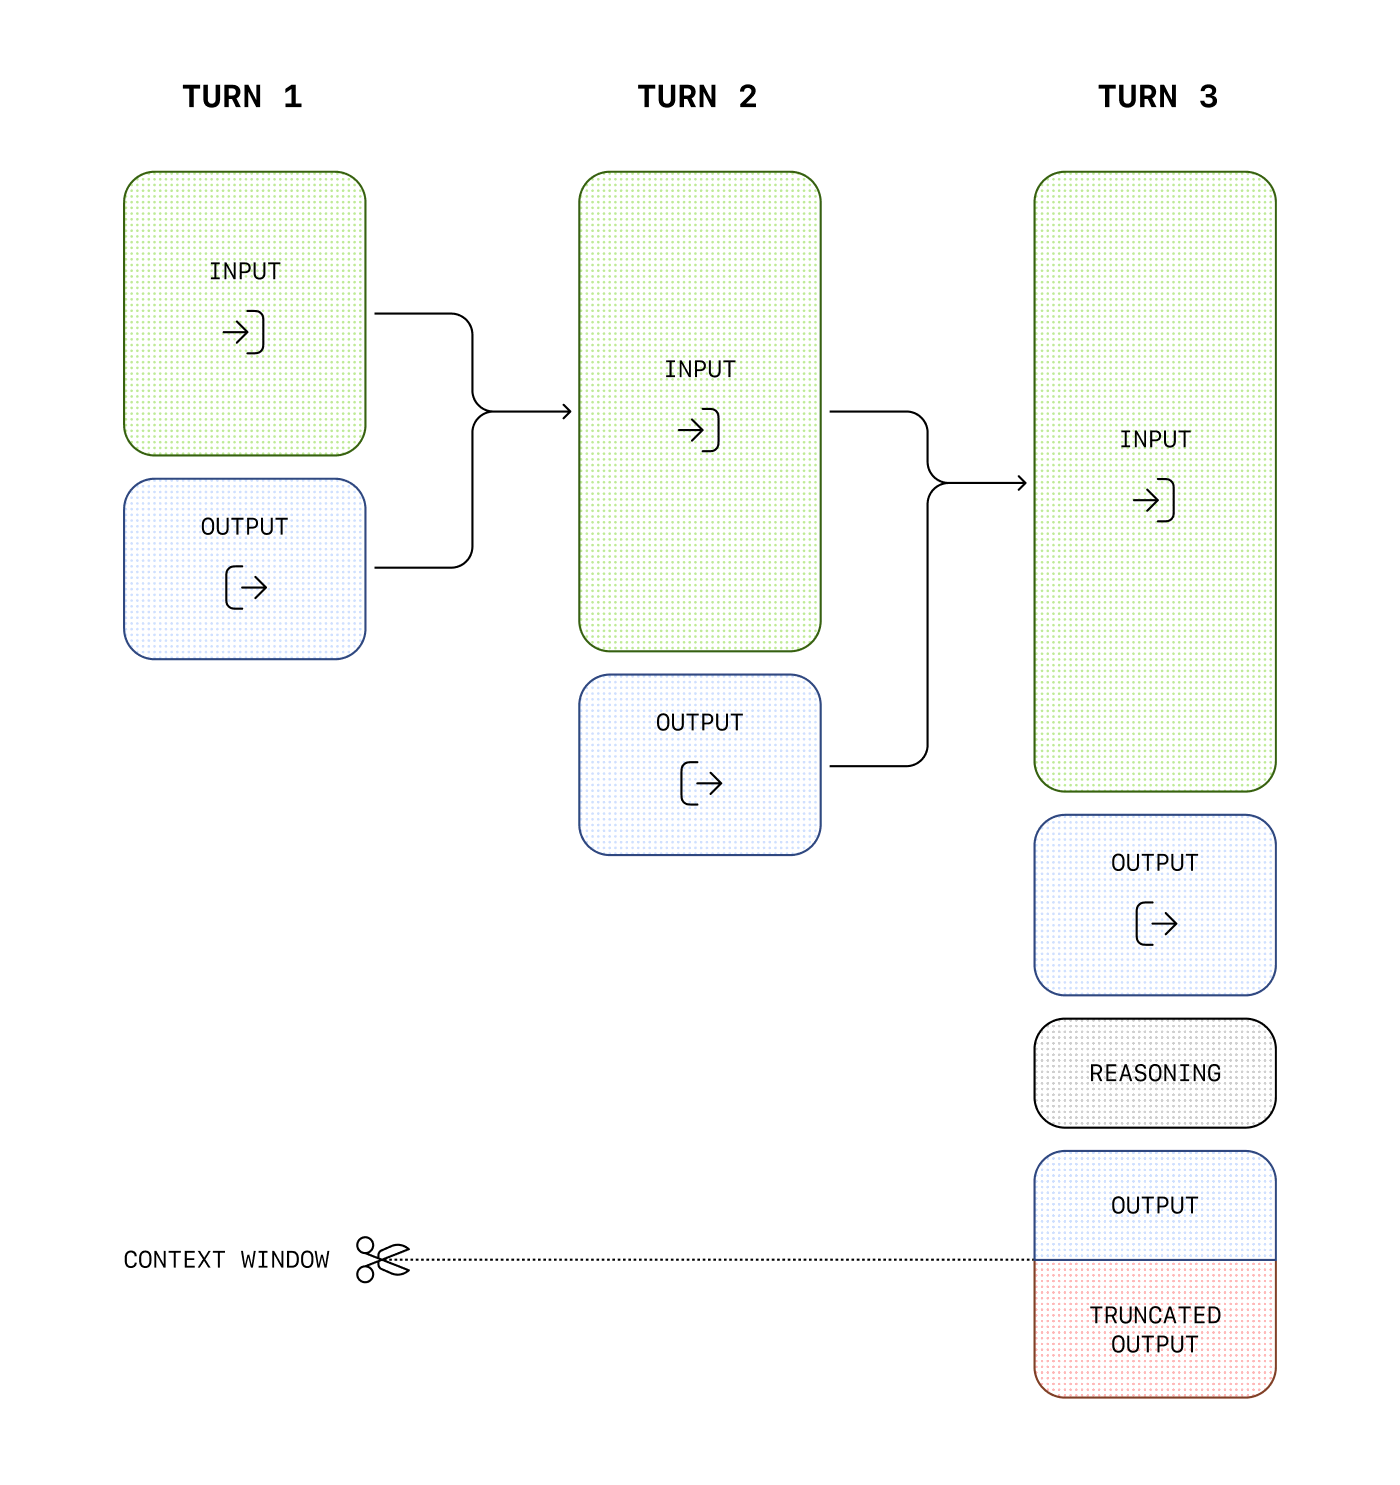

***Example:***

***Context window***: 128K tokens

***Your input***: 1K tokens

***Model's internal reasoning***: 20K tokens

***Available for response***: Only 107K tokens left!

---

# ***Best practices:***


Set max_completion_tokens to reserve space for output

Be aware reasoning can consume significant tokens

Reference: https://platform.openai.com/docs/guides/reasoning/managing-the-context-window

***When to use:***

Complex reasoning (math, coding, deep analysis)
When quality matters more than token efficiency

Trade-off: Better answers, higher token costs


***🎯 Key Takeaways***

Best practices for every application:

 -  ✅ Count tokens before API calls (use official libraries)
 -  ✅ Optimize system prompts (sent with every request)
 -  ✅ Chunk large documents (map-reduce pattern)
 -  ✅ Manage history (sliding window or summarization)
 -  ✅ Monitor usage (track costs in production)


---
***Remember:***

- Context windows are growing (now 200K+ tokens!)
- But optimization still matters for cost efficiency
- Token optimization = cost optimization at scale



***Pro tip:*** Build token budgets into your application design from day one. Don't wait until you get a surprise $10,000 bill!




##Lets look at a simple example on how to count tokens using OpenAI's tiktoken library

First step is to install the library


In [6]:
%pip install tiktoken

In [8]:
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

count_tokens = num_tokens_from_string("tiktoken is great, what do you think about it. !", "o200k_base")
print(f" Total tokens is : {count_tokens}")


 Total tokens is : 14


# 🎯 Summary & Key Takeaways

Congratulations! You now understand tokenization - a fundamental concept that affects everything in LLMs.

---

## 🧠 What We Covered

### **1. Why Tokenization Exists**
- ❌ **Word-level:** Huge vocabulary (170,000+ words), can't handle new words
- ❌ **Character-level:** Tiny vocabulary but sequences are too long
- ✅ **Subword (BPE):** Perfect balance - ~50,000 tokens, handles any text


---

### **2. How BPE Works**
- Start with characters
- Count adjacent pairs
- Merge most frequent pairs
- Repeat until target vocabulary size

**Algorithm is simple but powerful:**
- Learns from data (frequency-driven)
- Handles any word (even ones never seen)
- Deterministic and reproducible

**Example we built:**
- Training corpus: "goa goal go"
- Learned tokens: 'go', 'goa', 'goal'
- Can tokenize new words like "gone" → ['go', 'n', 'e']

---

### **3. Practical Token Management**

**Why tokens matter:**
1. **Billing** - You pay per token
2. **Context limits** - Models have max token capacity

**Optimization strategies:**
- ✅ Clean formatting (remove extra spaces, unnecessary markdown)
- ✅ Avoid repetition ("very very very" → "extremely")
- ✅ Chunk large documents (map-reduce pattern)
- ✅ Manage conversation history (sliding window or summarization)
- ✅ Optimize system prompts (sent with every request)

**Special consideration:** Reasoning models  use tokens for internal thinking too!

---
# 🎓 What You Can Now Do
After this notebook, you can:

- ✅ Explain why tokenization exists and how it works
- ✅ Count tokens before making API calls
- ✅ Estimate and optimize API costs
- ✅ Manage context windows in chatbots
- ✅ Understand why LLMs struggle with certain tasks
- ✅ Make informed decisions about prompt engineering
---

***Questions? Feedback? Found this helpful?***

Star the repo ⭐ and share your learnings!

Repository: [llm_journey](github.com/happyahluwalia/llm_journey)

